In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread
import matplotlib.pyplot as plt 
from skimage import draw
import numpy as np 
import os
from skimage.segmentation import chan_vese
from skimage import data, img_as_float
from skimage import feature, measure
from skimage.transform import resize
import matplotlib.pyplot as plt
from os.path import join
from glob import glob
from time import time
import cv2
import random

## Ввод и вывод изображений

In [10]:
imgs = ['red_3.jpg', 'red_4.jpg', 'motley-1.jpg', 'motley-2.jpg', 'motley-3.jpg', 'motley-4.jpg', 'motley-5.jpg', 'many_colour_puzzle.jpg','one_colour_puzzle.jpg']

In [3]:
col_image = cv2.imread('red_3.jpg') # B - G - R
gr_image = cv2.imread('red_3.jpg', cv2.IMREAD_GRAYSCALE)
col_image_1 = imread('red_3.jpg')
gr_image_1 = imread('red_3.jpg', as_gray=True)

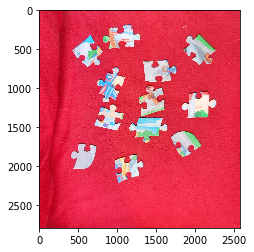

In [4]:
plt.imshow(col_image[:,:,[2,1,0]]) # в правильном порядке для OpenCV

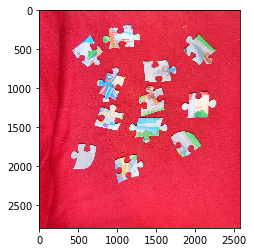

In [5]:
plt.imshow(col_image_1)

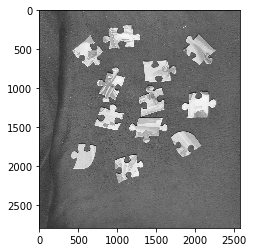

In [6]:
plt.imshow(gr_image, cmap='gray')

## Гистограмма и простейший порог бинаризации

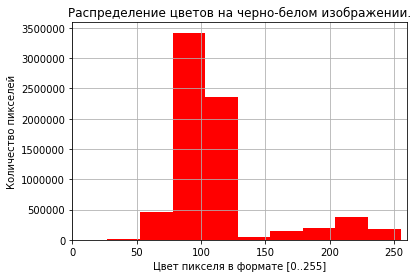

In [7]:
plt.hist(gr_image.ravel(), color='red')
plt.title('Распределение цветов на черно-белом изображении.')
plt.xlabel('Цвет пикселя в формате [0..255]')
plt.ylabel('Количество пикселей')
plt.xlim([0, 260])
plt.grid()
plt.savefig('hist_gray.pdf')

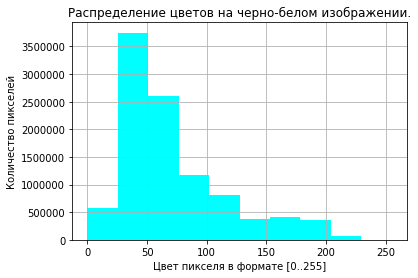

In [8]:
gr_image_2 = cv2.imread('motley-1.jpg', cv2.IMREAD_GRAYSCALE)
plt.hist(gr_image_2.ravel(), color='cyan')
plt.title('Распределение цветов на черно-белом изображении.')
plt.xlabel('Цвет пикселя в формате [0..255]')
plt.ylabel('Количество пикселей')
plt.grid()
plt.savefig('hist_gray_1.pdf')

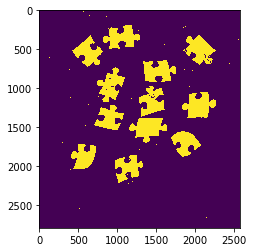

In [11]:
pict = np.copy(gr_image)
pict[gr_image >= np.mean(gr_image) + 20] = 255
pict[gr_image < np.mean(gr_image) + 20] = 0
plt.imshow(pict)
plt.savefig('bin_hist.pdf')

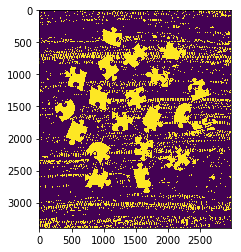

In [12]:
pict_1 = np.copy(gr_image_2)
pict_1[gr_image_2 >= np.mean(gr_image_2) + 20] = 255
pict_1[gr_image_2 < np.mean(gr_image_2) + 20] = 0
plt.imshow(pict_1)
plt.savefig('bin_hist_1.pdf')

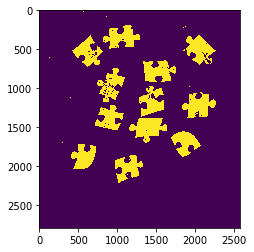

In [13]:
_, thresh = cv2.threshold(gr_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh)

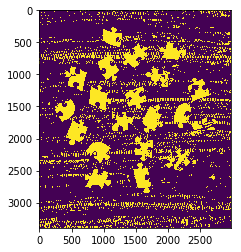

In [14]:
_, thresh = cv2.threshold(gr_image_2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh)

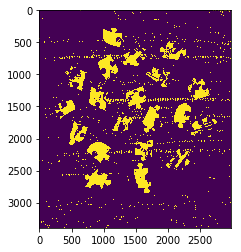

In [3]:
gr_image_2 = cv2.imread('motley-1.jpg', cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(gr_image_2,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='viridis')
plt.savefig('127_mot.pdf')

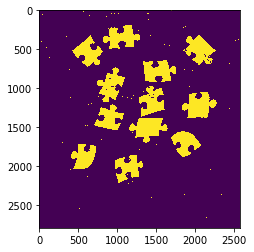

In [4]:
gr_image_2 = cv2.imread('red_3.jpg', cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(gr_image_2,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='viridis')
plt.savefig('127_red.pdf')

## Использование простейших средств OpenCV + эксперименты с машинным обучением

['many_colour_puzzle.jpg', 'motley-1.jpg', 'Motley-11.jpg', 'motley-2.jpg', 'motley-3.jpg', 'motley-4.jpg', 'motley-5.jpg', 'one_colour_puzzle.jpg', 'red_3.jpg', 'red_4.jpg']


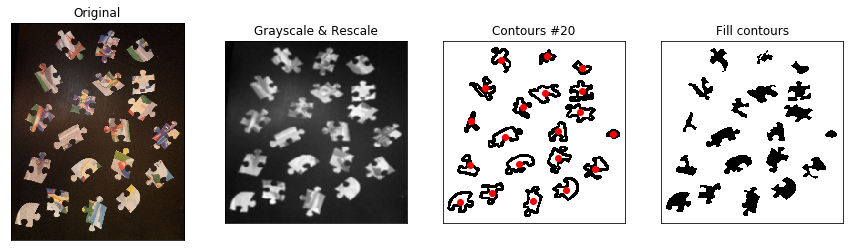

0: time: 0.9701581001281738


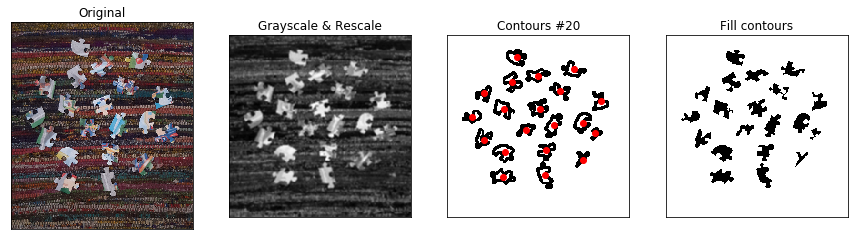

1: time: 1.0027093887329102


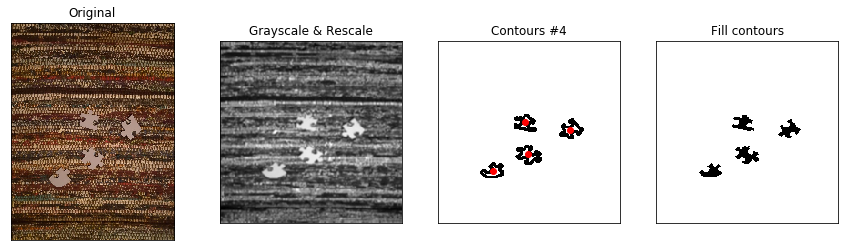

2: time: 0.29999732971191406


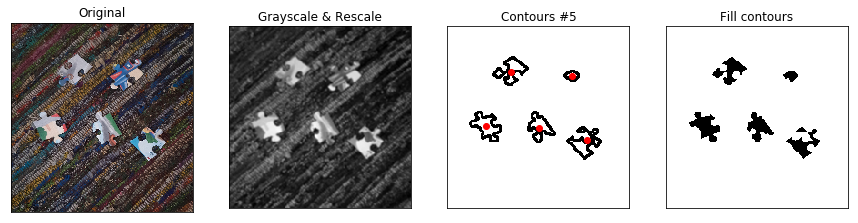

3: time: 0.9582657814025879


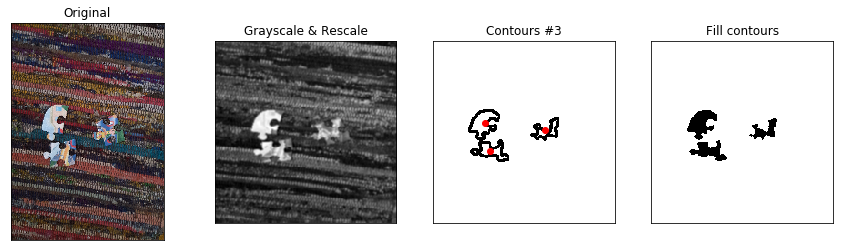

4: time: 0.969158411026001


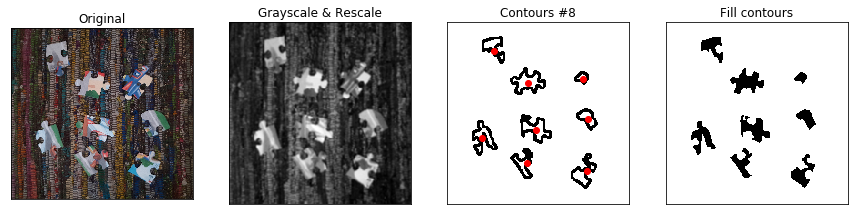

5: time: 0.8996424674987793


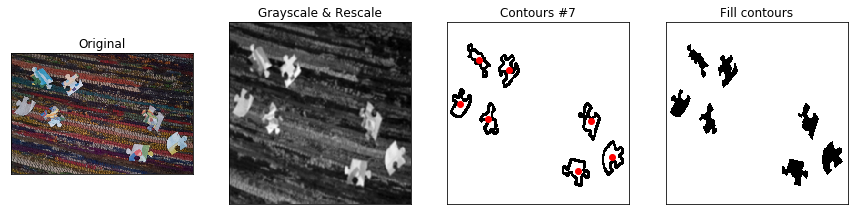

6: time: 1.4444162845611572


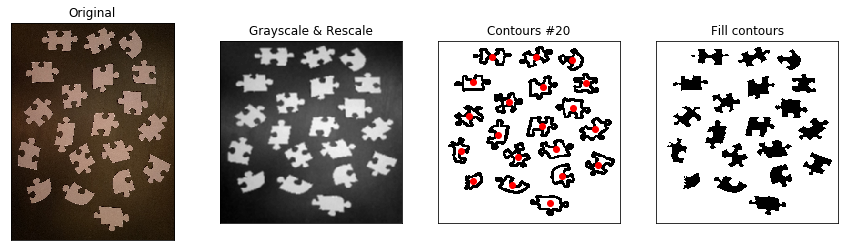

7: time: 0.8786706924438477


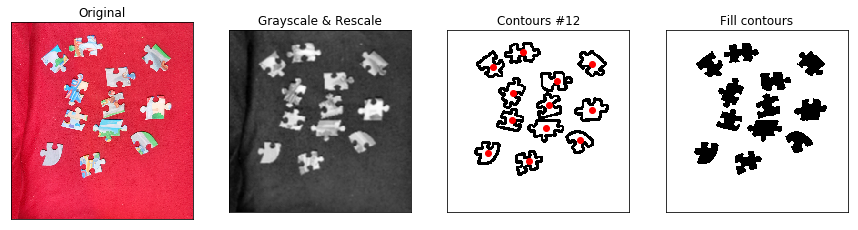

8: time: 0.7415316104888916


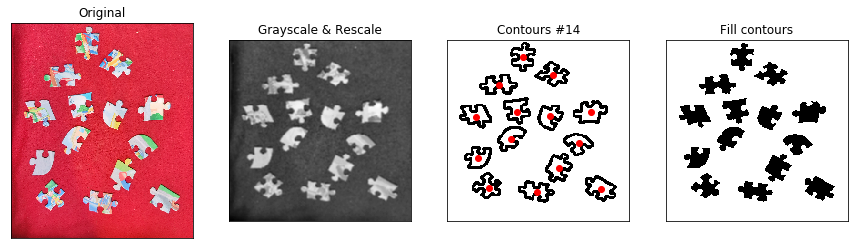

9: time: 0.8809459209442139


In [6]:
def off_ticks(axes):
    axes.set_xticks([])
    axes.set_yticks([])
def Run(img, as_gray=False):
    gridsize = (1, 4)
    fig = plt.figure(figsize=(15, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0))
    ax2 = plt.subplot2grid(gridsize, (0, 1))
    ax3 = plt.subplot2grid(gridsize, (0, 2))
    ax4 = plt.subplot2grid(gridsize, (0, 3))
    off_ticks(ax1), off_ticks(ax2), off_ticks(ax3), off_ticks(ax4)
    # -------------------------------------------
    # img = cv2.imread(r'data/Red_3.jpg')
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')
    # -------------------------------------------
    
    kernel = np.ones((3,3))
    
    img = cv2.resize(img, (200, 200))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0)
#     img = cv2.erode(img, kernel, iterations=6)
#     img = cv2.dilate(img, kernel, iterations=2)
    if not as_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ax2.imshow(img, cmap='gray')
    ax2.set_title('Grayscale & Rescale')
    # -------------------------------------------
    _, thresh = cv2.threshold(img, 127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    i = 0
    #min_arr_size = 100

    while i < len(contours):
        if cv2.contourArea(contours[i]) < 40:
            del contours[i]
        else:
            rot_rect = cv2.minAreaRect(contours[i])
            #min_arr_size = min(len(contours[i]), min_arr_size)
            ax3.plot(*rot_rect[0], 'ro')
            i += 1 
            
#     print(min_arr_size)

#     dist = np.zeros((len(contours), min_arr_size))
    
#     for i, contour in enumerate(contours):
#         rot_rect = cv2.minAreaRect(contour)
#         lst = []
#         for j, point in enumerate(contour):
#             alpha = (np.array(rot_rect[0]).reshape(1, -1) - point.reshape(1, -1)).reshape(1, -1)
#             lst.append((np.sum(alpha * alpha)) ** 0.5)
#             cur_len = j
#             alpha = 0
            
#         while len(lst) > min_arr_size:
#             del lst[random.randint(0, len(lst) - 1)]
        
#         dist[i] = np.array(lst)
            
# #         for k in range(j + 1, max_arr_size):
# # #             dist[i, k] = dist[i, alpha]
# # #             if alpha >= cur_len - 1:
# # #                 alpha = 0
# # #             else:
# # #                 alpha += 1
# #             dist[i, k] = 0
            
    cntrimg = np.ones_like(img)
    cv2.drawContours(cntrimg, contours,
                     contourIdx=-1, color=0, thickness=2)
    ax3.imshow(cntrimg, cmap='gray')
    ax3.set_title(f'Contours #{len(contours)}')

    # -------------------------------------------
    fillcntr = np.ones_like(img)
    cv2.drawContours(fillcntr, contours,
                     contourIdx=-1, color=0, thickness=-1)
    ax4.imshow(fillcntr, cmap='gray')
    ax4.set_title(f'Fill contours')
    # -------------------------------------------
    plt.show()
    plt.close()
    
    #return dist

# Запуск
file_path = glob(os.path.join('*.jpg'))
print(file_path)

distances_matrix = []

for i, image_path in enumerate(file_path):
    run_time = time()
    #distances_matrix.append(Run(cv2.imread(image_path)))
    Run(cv2.imread(image_path))
    print(f'{i}: time: {time() - run_time}')

In [3]:
max_shape = 0
for i in distances_matrix:
    max_shape = max(i.shape[1], max_shape)
for i, matrix in enumerate(distances_matrix):
    a = np.zeros((matrix.shape[0], max_shape))
    a[:, :matrix.shape[1]] = matrix
    alpha = 0
    for k in range(matrix.shape[1], a.shape[1]):
        #alpha = random.randint(0, matrix.shape[1]-1)
        a[:, k] = matrix[:, alpha]
        if alpha >= matrix.shape[1] - 1:
            alpha = 0
        else:
            alpha += 1
    distances_matrix[i] = a

In [267]:
max_shape = 0
for arr in distances_matrix:
    max_shape = max(max_shape, arr.shape[1])
max_shape

64

In [315]:
new_matr = np.zeros((113, max_shape))
for i, arr in enumerate(distances_matrix):
    for string in arr:
        string = list(string)
        while len(string) != max_shape:
            a = np.roll(string, 1)
            k = 0
            while len(string) != max_shape and k != a.shape[0]:
                string.append(a[k])
                k += 1
        new_matr[i] = np.array(string)

In [319]:
new_matr.shape

(113, 64)

In [250]:
# new_matr = []
# for i, elem in enumerate(distances_matrix):
#     new_matr.append([])
#     for j in range(elem.shape[0]):
#         new_lst = []
#         for _ in range(4):
#             new_lst.append(np.max(elem[j]))
#             elem[j, np.argmax(elem[j])] = 0
            
#         for k in range(4):
#             print(elem[j, np.where(elem[j] > 0)])
#             new_lst.append(np.min(elem[j, np.where(elem[j] > 0)]))
#             alpha = np.argmin(elem[j, np.where(elem[j] > 0)])
#             print(alpha)
#             print(elem[j, np.where(elem[j] > 0)])
#             elem[j, np.where(elem[j] > 0)][alpha] = 0
        
#         new_matr[i].append(new_lst)
#         d = np.array(new_lst)
#         #new_matr[i].append(list((d - np.mean(d)) / (np.std(d) + 1e-9)))

In [251]:
#new_matr

In [73]:
dataset = []
for elem in distances_matrix:
    for j in elem:
        dataset.append(j)

In [237]:
X_train = new_matr[:99]
X_test = dataset[99:]
y_train = np.array([1, 4, 7, 1, 4, 1, 3, 4, 7, 4, 3, 2, 4, 7, 4, 3, 4, 0, 2, 2, 2, 4, 2, 1, 7, 4, 5, 7, 6, 1, 0, 4, 4, 3, 3, 2, 3, 2, 4, 1, 1, 2, 3, 3, 3, 4, 4, 6, 3, 7, 7, 1, 3, 3, 4, 2, 0, 5, 2, 3, 4, 1, 4, 7, 1, 3, 6, 6, 1, 1, 1, 3, 7, 4, 3, 4, 5, 3, 2, 4, 7, 4, 4, 3, 0, 2, 2, 7, 1, 0, 6, 3, 4, 3, 6, 3, 4, 3, 2])
y_test = np.array([2, 4, 7, 4, 1, 0, 1, 1, 4, 4, 3, 2, 7, 2])

In [231]:
X_train = dataset[87:99]
X_test = dataset[99:]
y_train = np.array([7, 1, 0, 6, 3, 4, 3, 6, 3, 4, 3, 2])
y_test = np.array([2, 4, 7, 4, 1, 0, 1, 1, 4, 4, 3, 2, 7, 2])

In [182]:
y_test.shape

(14,)

In [176]:
y_train.shape

(99,)

In [157]:
y_train = np.array([1, 4, 7, 1, 4, 1, 3, 4, 7, 4, 3, 2, 4, 7, 4, 3, 4, 0, 2, 2, 2, 4, 2, 1, 7, 4, 5, 7, 6, 1, 0, 4, 4, 3, 3, 2, 3, 2, 4, 1, 1, 2, 3, 3, 3, 4, 4, 6, 3, 7, 7, 1, 3, 3, 4, 2, 0, 5, 2, 3, 4, 1, 4, 7, 1, 3, 6])

In [78]:
y_test = np.array([6, 1, 1, 1, 3, 7, 4, 3, 4, 5, 3, 2, 4, 7, 4, 4, 3, 0, 2, 2, 7, 1, 0, 6, 3, 4, 3, 6, 3, 4, 3, 2, 2, 4, 7, 4, 1, 0, 1, 1, 4, 4, 3, 2, 7, 2])

In [59]:
#первое фото: y_test = [1, 4, 7, 1, 4, 1, 3, 4, 7, 4, 3, 2, 4, 7, 4, 3, 4, 0, 2, 2]
#второе фото: [2, 4, 2, 1, 7, 4, 5, 7, 6, 1, 0, 4, 4, 3, 3, 2, 3, 2, 4, 1]
#третье фото:[1, 2, 3, 3]-> завершено
#четвертое фото:[3, 4, 4, 6, 3] -> завершено
#пятое фото: [7, 7, 1] -> завершено
#шестое фото:[3, 3, 4, 2, 0, 5, 2, 3]->завершено
#седьмое фото:[4, 1, 4, 7, 1, 3, 6]->завершено
#восьмое фото:[6, 1, 1, 1, 3, 7, 4, 3, 4, 5, 3, 2, 4, 7, 4, 4, 3, 0, 2, 2]
#девятое фото:[7, 1, 0, 6, 3, 4, 3, 6, 3, 4, 3, 2] ->завершено
#десятое фото:[2, 4, 7, 4, 1, 0, 1, 1, 4, 4, 3, 2, 7, 2] ->завершено

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [120]:
classes = ['P0B2', 'P1B1', 'P2B2', 'P1B2', 'P2B1', 'P3B1', 'P3B0', 'P1B3']
#0, 1, 2, 3, 4, 5, 6, 7

In [180]:
X_train = dataset[:67]
X_test = dataset[67:]

In [241]:
obj = KNeighborsClassifier(1)
print(X_train.shape, y_train.shape)
obj.fit(X_train, y_train)
y_pred = obj.predict(X_test)
print(np.mean(y_pred == y_test))

(99, 8) (99,)
0.07142857142857142


In [242]:
y_pred, y_test #2

(array([5, 3, 7, 1, 3, 4, 4, 0, 3, 0, 2, 4, 2, 1]),
 array([2, 4, 7, 4, 1, 0, 1, 1, 4, 4, 3, 2, 7, 2]))

### Функция для разметки пазлов

In [214]:
def draw(img, y_pred):
    gridsize = (1, 4)
    fig = plt.figure(figsize=(15, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0))
    ax2 = plt.subplot2grid(gridsize, (0, 1))
    ax3 = plt.subplot2grid(gridsize, (0, 2))
    ax4 = plt.subplot2grid(gridsize, (0, 3))
    off_ticks(ax1), off_ticks(ax2), off_ticks(ax3), off_ticks(ax4)
    # -------------------------------------------
    # img = cv2.imread(r'data/Red_3.jpg')
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')
    # -------------------------------------------
    
    kernel = np.ones((3,3))
    
    img = cv2.resize(img, (200, 200))
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    #     img = cv2.erode(img, kernel, iterations=6)
    #     img = cv2.dilate(img, kernel, iterations=2)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ax2.imshow(img, cmap='gray')
    ax2.set_title('Grayscale & Rescale')
    # -------------------------------------------
    _, thresh = cv2.threshold(img, 127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    i = 0
    max_arr_size = 0

    while i < len(contours):
        if cv2.contourArea(contours[i]) < 40:
            del contours[i]
        else:
            rot_rect = cv2.minAreaRect(contours[i])
            max_arr_size = max(len(contours[i]), max_arr_size)
            ax3.plot(*rot_rect[0], 'ro')
            alpha = y_pred[i]
            arr = np.array(contours[i]).reshape(-1, 2)
            
            ax3.text(np.max(arr.T[0]), np.max(arr.T[1]), s = classes[alpha],
                rotation = 0,
                fontsize = 15, color='magenta')
            i += 1 
                
    cntrimg = np.ones_like(img)
    cv2.drawContours(cntrimg, contours,
                     contourIdx=-1, color=0, thickness=2)
    ax3.imshow(cntrimg, cmap='gray')
    ax3.set_title(f'Contours #{len(contours)}')

    # -------------------------------------------
    fillcntr = np.ones_like(img)
    cv2.drawContours(fillcntr, contours,
                     contourIdx=-1, color=0, thickness=-1)
    ax4.imshow(fillcntr, cmap='gray')
    ax4.set_title(f'Fill contours')
    # -------------------------------------------
    plt.show()
    plt.close()
    

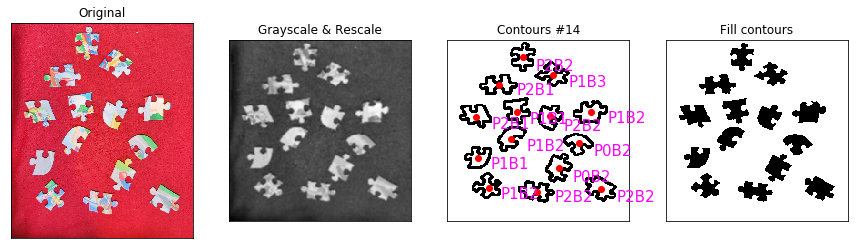

In [215]:
draw(cv2.imread('red_4.jpg'), y_pred)

## Алгоритм chan_vese

In [24]:
def chan(pict):
    image = img_as_float(pict)
    
    image = resize(image, (256, 256))

    cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                   dt=0.5, init_level_set="checkerboard", extended_output=True)

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("Original Image", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)

    ax[3].plot(cv[2])
    ax[3].set_title("Evolution of energy over iterations", fontsize=12)

    fig.tight_layout()
    plt.show()

## Алгоритм Кэнни

In [52]:
def canny(img):
    img = resize(img, (200, 200)) 
    img = (img * 255).astype(np.uint8)
    edges = feature.canny(img)
    label_image = measure.label(edges)
    image_copy = img.copy()
    for region in measure.regionprops(label_image) :
        if region.area < 70:
            continue
        minr , minc , maxr , maxc = region.bbox
        image_copy [ minr : maxr , (minc , maxc ) ] = 255
        image_copy [ ( minr , maxr ) , minc : maxc ] = 255
        
    plt.imshow(image_copy, cmap='viridis')

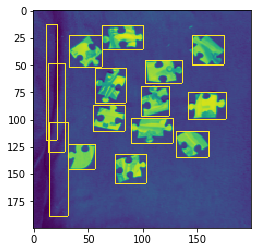

In [55]:
canny(imread('red_3.jpg', as_gray=True))
plt.savefig('red_canny.jpg')

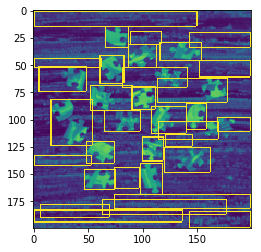

In [56]:
canny(imread('motley-1.jpg', as_gray=True))
plt.savefig('mot-canny.jpg')

## Смесь алгоритмов(нескольких вышеперечесиленных)

In [80]:
def detect_bound(pict):
    
    #new_image = cv2.cvtColor(np.float32(pict), cv2.COLOR_BGR2GRAY) 
    #new_image = np.float32(pict)
    #pict = new_image
    new_image = cv2.GaussianBlur(pict, (3, 3), 0) 
    new_image = resize(new_image, (256, 256)) 
    new_image = (new_image * 255).astype(np.uint8)
    
    pict = new_image.copy()
    
    image = img_as_float(pict)
    cv = chan_vese(image, mu=0.1, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
                   dt=0.5, init_level_set="checkerboard", extended_output=True)
    
    plt.imshow(new_image)
    s = 0
    edges = feature.canny(cv[0])#, sigma=5)
    label_image = measure.label(edges)
    image_copy = cv[0].copy()
    for region in measure.regionprops(label_image) :
        if region.area < 62:
            continue
        minr , minc , maxr , maxc = region.bbox
        image_copy [ minr : maxr , (minc , maxc ) ] = 255
        image_copy [ ( minr , maxr ) , minc : maxc ] = 255
                
        s += 1
        
    ret, thresh = cv2.threshold(image_copy.astype(np.uint8), 127, 255, 0) 
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    cntrimg = cv2.drawContours(np.ones_like(image_copy.astype(np.uint8)), contours, -1, (0,255,0), 3) 
    
    plt.imshow(image_copy)

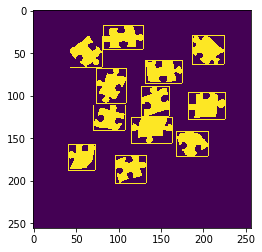

In [87]:
detect_bound(imread('red_3.jpg', as_gray=True))
plt.savefig('can+chan_red.pdf')

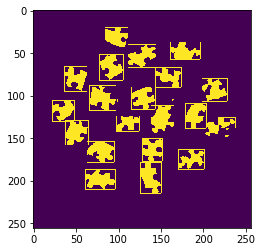

In [88]:
detect_bound(imread('motley-1.jpg', as_gray=True))
plt.savefig('can+chan_mot.pdf')

## Использование различных фильтров

In [6]:
def check(img):
    #img = cv2.imread('many_colour_puzzle.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Вычисляем маску фона
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Убираем шум
    kernel = np.ones((5, 5), np.uint8)
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    opening = thresh

    # создаем маску фона
    sure_bg = cv2.erode(opening, kernel, iterations=1)
    sure_bg = cv2.dilate(sure_bg, kernel, iterations=6)
    sure_bg = cv2.GaussianBlur(sure_bg, (3, 3), 0)

    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Вычисляем "неопределенный регион" из вычисленных фона и переднего плана
    # В большинстве случаев это просто фон, т.к. передний план считается плохо.
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Размечаем маркеры. Они будут использованы для вычисления фона алгоритмом watershed
    ret, markers = cv2.connectedComponents(sure_fg)
    print(ret)
    # Добавляем единичку ко всем значениям, чтобы они были больше 0. Он отвечает за "неизвестную" область.
    markers = markers + 1
    # Добавляем "неизвестную" область на маркеры
    markers[unknown == 255] = 0

    # собственно считаем
    markers = cv2.watershed(img, markers)
    # и рисуем наши маркеры на изображении
    img[markers == -1] = [255, 0, 0]

    pict = 255 - sure_bg

    #plt.imshow(pict, cmap='gray')
    
    return  pict

## Смесь алгоритмов

In [7]:
def Run_1(img, as_gray=False):
    gridsize = (1, 4)
    fig = plt.figure(figsize=(15, 4))
    ax1 = plt.subplot2grid(gridsize, (0, 0))
    ax2 = plt.subplot2grid(gridsize, (0, 1))
    ax3 = plt.subplot2grid(gridsize, (0, 2))
    ax4 = plt.subplot2grid(gridsize, (0, 3))
    off_ticks(ax1), off_ticks(ax2), off_ticks(ax3), off_ticks(ax4)

    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax1.set_title('Original')

    img = check(img)
    img = cv2.resize(img, (200, 200))
    
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    ax2.imshow(img, cmap='gray')
    ax2.set_title('Grayscale & Rescale')

    i = 0
    while i < len(contours):
        #print(cv2.arcLength(contours[i], closed=True))
        if cv2.contourArea(contours[i]) < 35 or cv2.arcLength(contours[i], closed=True) < 50 or cv2.arcLength(contours[i], closed=True) > 210:
            del contours[i]
        else:
            rot_rect = cv2.minAreaRect(contours[i]);
            ax3.plot(*rot_rect[0], 'ro')
            i += 1        

    cntrimg = np.ones_like(img)
    cv2.drawContours(cntrimg, contours,
                     contourIdx=-1, color=0, thickness=2)
    ax3.imshow(cntrimg, cmap='gray')
    ax3.set_title(f'Contours #{len(contours)}')

    # -------------------------------------------
    fillcntr = np.ones_like(img)
    cv2.drawContours(fillcntr, contours,
                     contourIdx=-1, color=0, thickness=-1)
    ax4.imshow(fillcntr, cmap='gray')
    ax4.set_title(f'Fill contours')
    # -------------------------------------------
    plt.show()
    plt.close()

['many_colour_puzzle.jpg', 'motley-1.jpg', 'Motley-10.jpg', 'Motley-11.jpg', 'Motley-12.jpg', 'Motley-13.jpg', 'Motley-14.jpg', 'Motley-15.jpg', 'Motley-16.jpg', 'Motley-17.jpg', 'motley-2.jpg', 'motley-3.jpg', 'motley-4.jpg', 'motley-5.jpg', 'one_colour_puzzle.jpg', 'red_3.jpg', 'red_4.jpg']
4


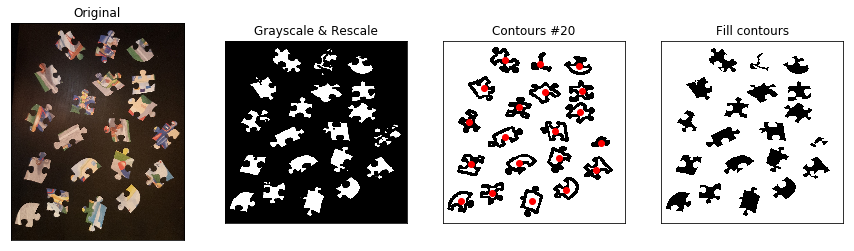

0: time: 1.7353394031524658
12


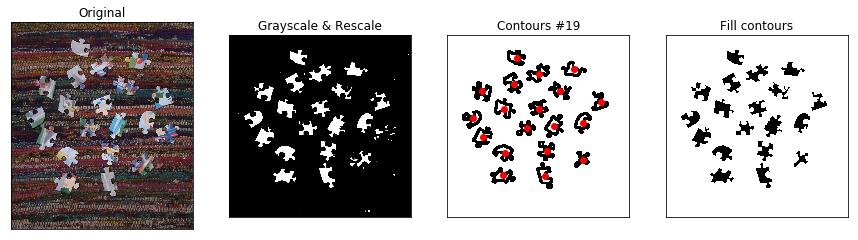

1: time: 1.7783880233764648
24


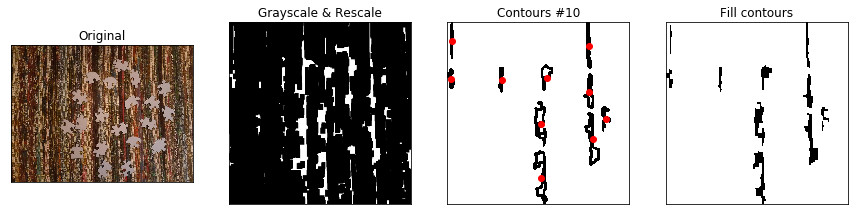

2: time: 0.34408116340637207
34


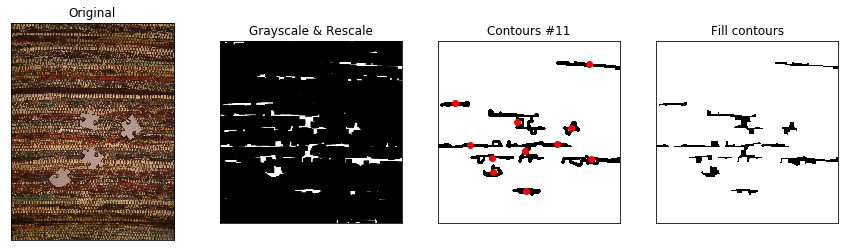

3: time: 0.33910346031188965
9


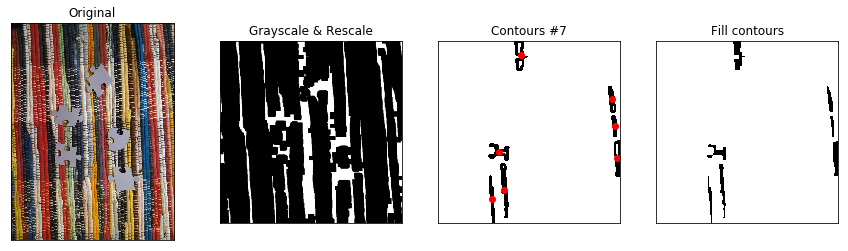

4: time: 0.3141601085662842
6


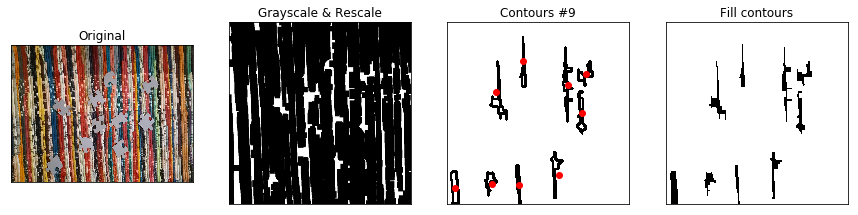

5: time: 0.32013511657714844
3


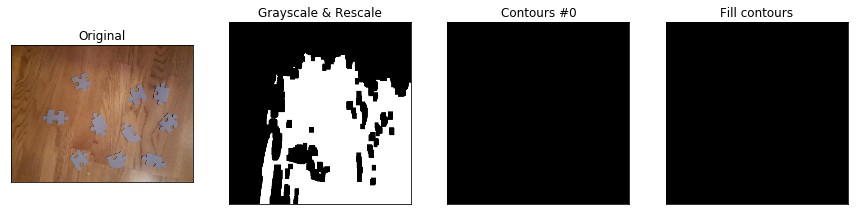

6: time: 0.2543332576751709
2


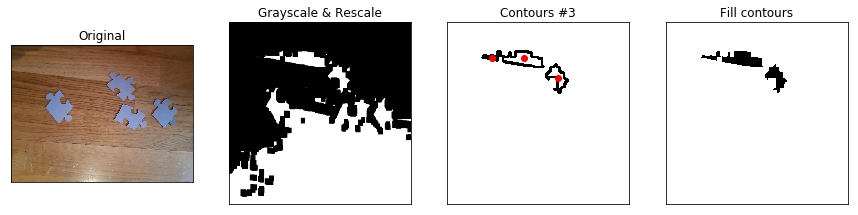

7: time: 0.319133996963501
2


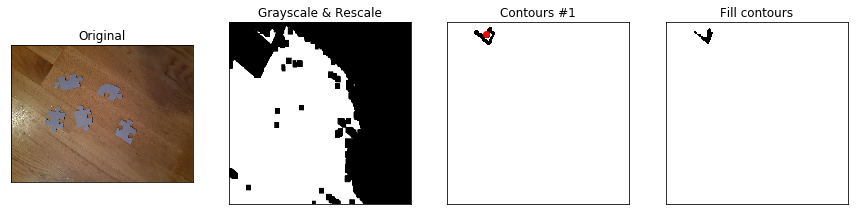

8: time: 0.2623932361602783
2


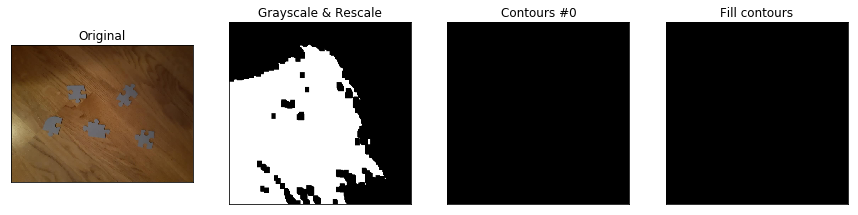

9: time: 0.26729679107666016
3


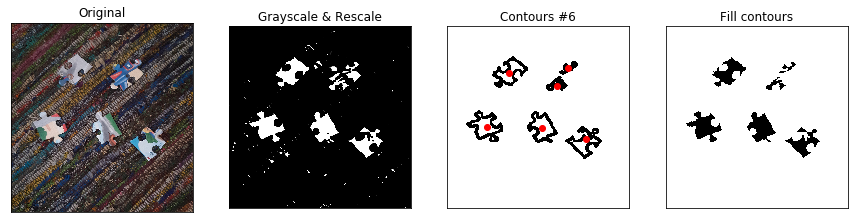

10: time: 1.7543082237243652
13


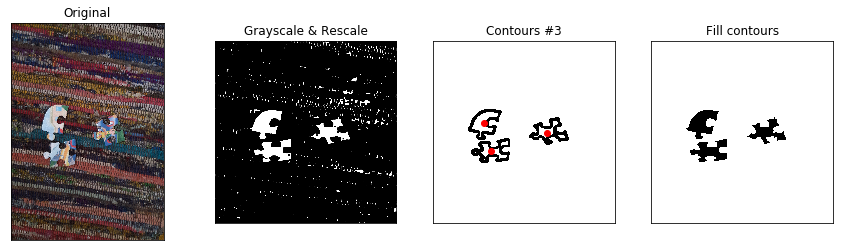

11: time: 1.9514262676239014
2


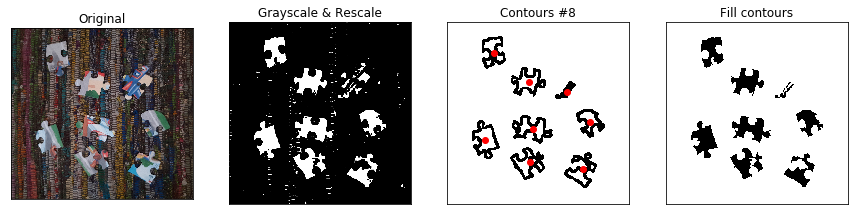

12: time: 1.8710377216339111
2


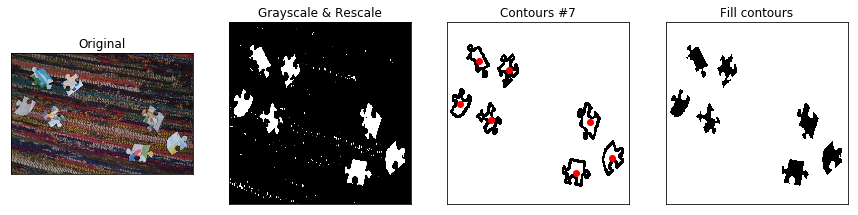

13: time: 2.090419054031372
3


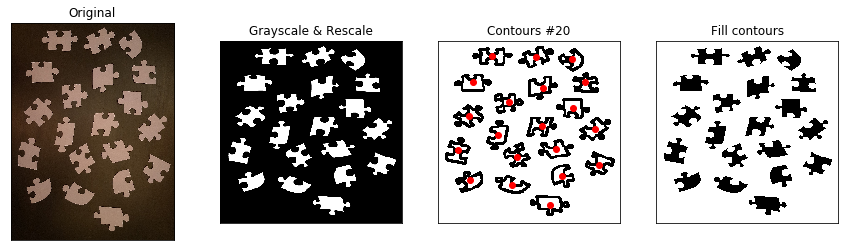

14: time: 1.5478637218475342
5


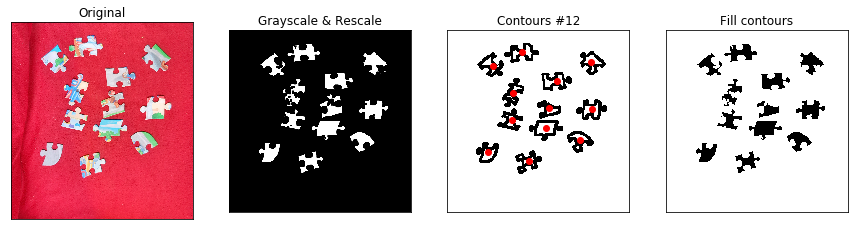

15: time: 1.2407658100128174
5


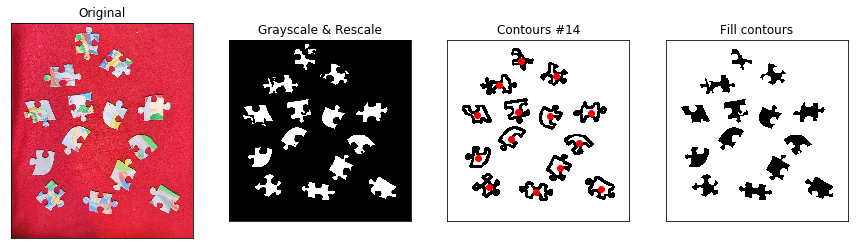

16: time: 1.5019867420196533


In [8]:
file_path = glob(os.path.join('*.jpg'))
print(file_path)

for i, image_path in enumerate(file_path):
    run_time = time()
    Run_1(cv2.imread(image_path))
    print(f'{i}: time: {time() - run_time}')